<h1 style="color:blue;text-align:center"> Linear Regression (Sheet 4)</h1>

<h4 style="color:green;text-align:center">Exercise 1</h4>

 For the X, Y data:
 

| xi | 2 | 6 | 3 | 4 | 5 |
|----|---|---|---|----|-----|
| yi | 3 | 7 | 4 |7 |6 |

In [2]:
install.packages('dplyr')


Installing package into ‘/home/jrana/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



ERROR: Error in install(dplyr): could not find function "install"


In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
x<-c(2,6,3,4,5)
y<-c(3,7,4,7,6)

In [4]:
## covariance
cov(x,y)

[1] 2.5

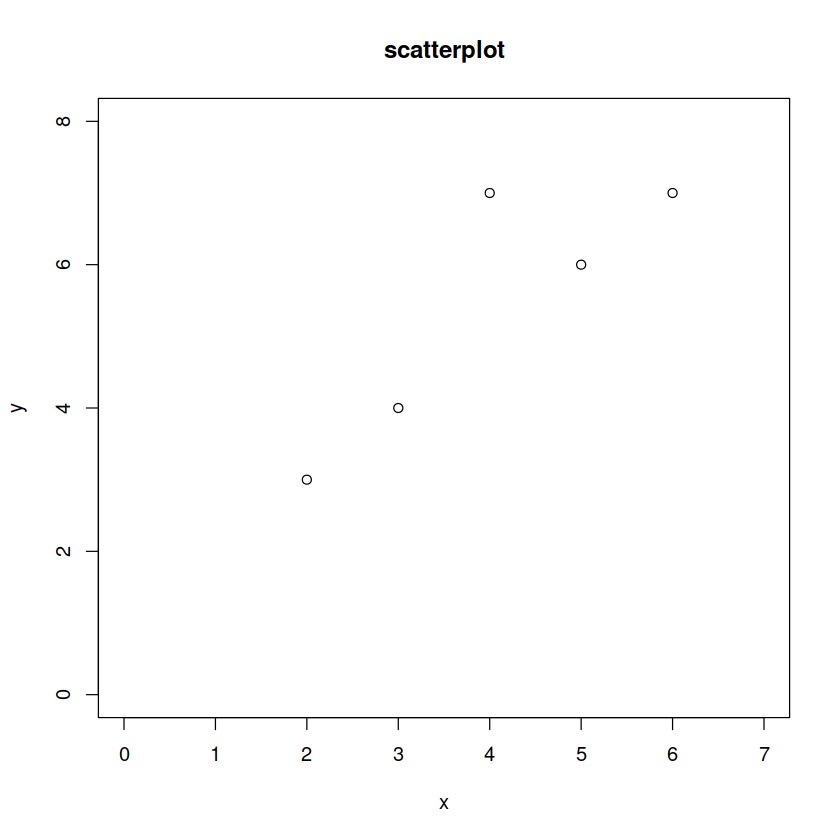

In [8]:
plot(x,y,main="scatterplot",xlim=c(0,7),ylim=c(0,8))

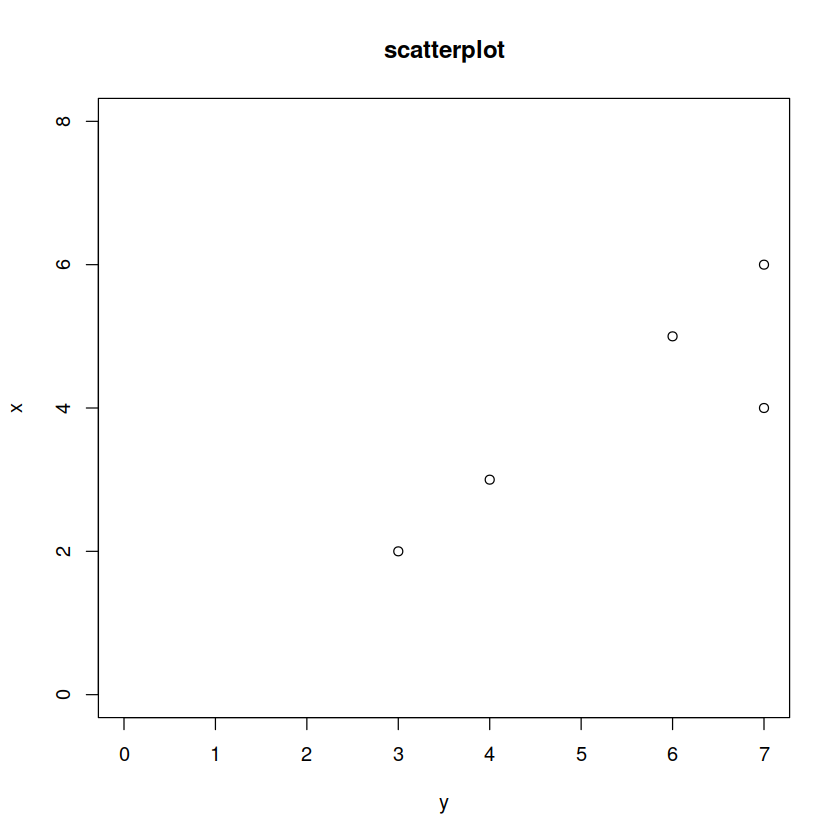

In [15]:
plot(y,x,main="scatterplot",xlim=c(0,7),ylim=c(0,8))

In [10]:
## coefficient of correlation
cor(x,y) %>% round(6)

[1] 0.870388

+ regression line: criterion variable Y and predictor variable X
   .y is target variable

In [11]:
model<-lm(y~x)

In [12]:
model$coefficients

(Intercept)           x 
        1.4         1.0

In [14]:
a<-model$coefficients[1]
b<-model$coefficients[2]
c(a,b)

(Intercept)           x 
        1.4         1.0

$x=\alpha + \beta y$ </br>
$\beta y = x- \alpha $ </br>
$y=\frac{1}{\beta}x - \frac{\alpha}{\beta}$ </br>
$y=\frac{1}{\beta}x + (- \frac{\alpha}{\beta})$ </br>


In [25]:
alpha<-lm(x~y)$coefficients[1]
beta<-lm(x~y)$coefficients[2]

In [26]:
alpha

(Intercept) 
-0.09090909

In [27]:
beta

y 
0.7575758

In [28]:
a_strich<-(-alpha/beta)
b_strich<- (1/beta)

In [29]:
a_strich

(Intercept) 
       0.12

In [30]:
b_strich

y 
1.32

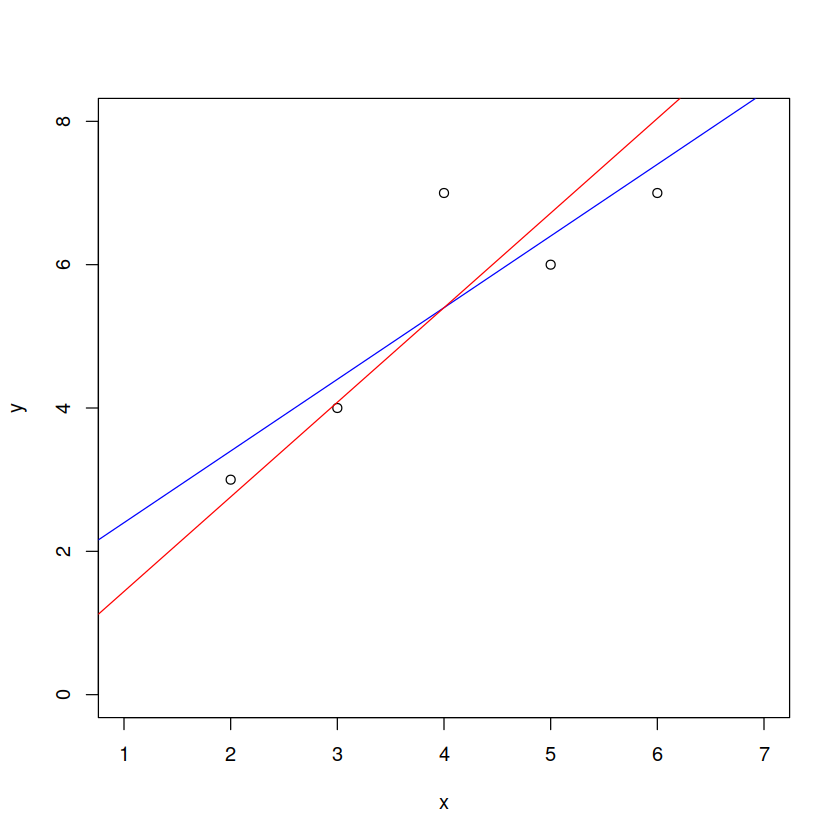

In [36]:
plot(x,y,xlim=c(1,7),ylim=c(0,8))
abline(lm(y~x),col='blue')
abline(a=a_strich,b=b_strich,col="red")

In [37]:
lm(y~x) ## y is dependent or target variable


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
        1.4          1.0  


<h4 style="color:green;text-align:center">Exercise 2</h4>

For a certain class, the relationship between the amount of time spent
in exercises (X) and the test score (Y) was examined.

In [41]:
x<-c(10,9,9,11,10,10,6,10,8,12,9,4,12)
y<-c(5,5,4,6,7,5,3,4,5,7,4,2,8)

In [42]:
length(x)

[1] 13

In [43]:
length(y)

[1] 13

+ Draw a scatterplot of the data.


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 9”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 9”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = deg

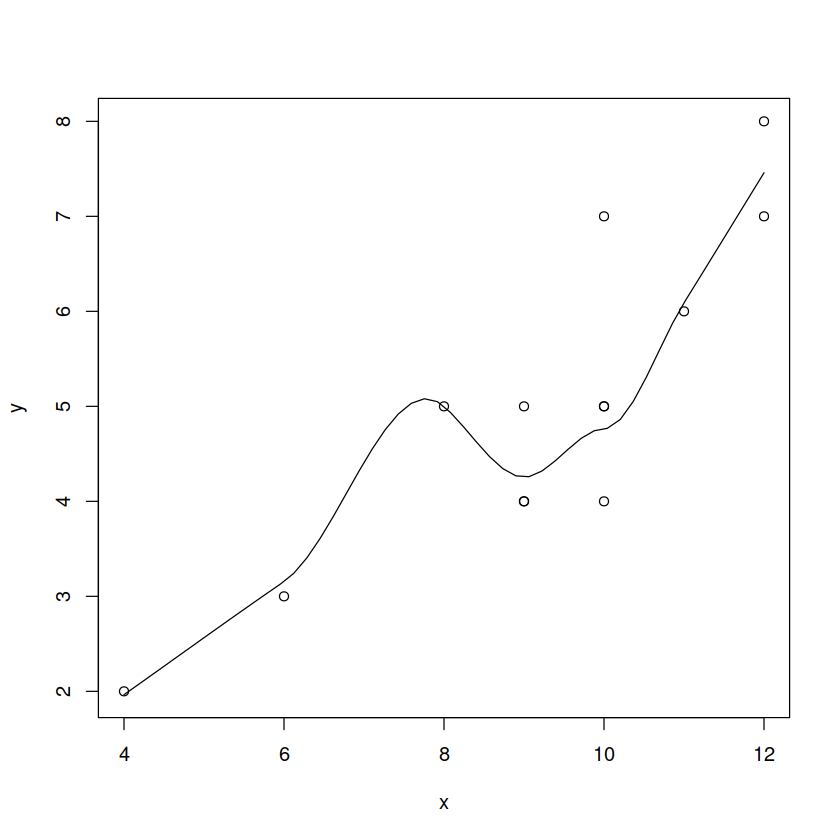

In [44]:
scatter.smooth(x,y)

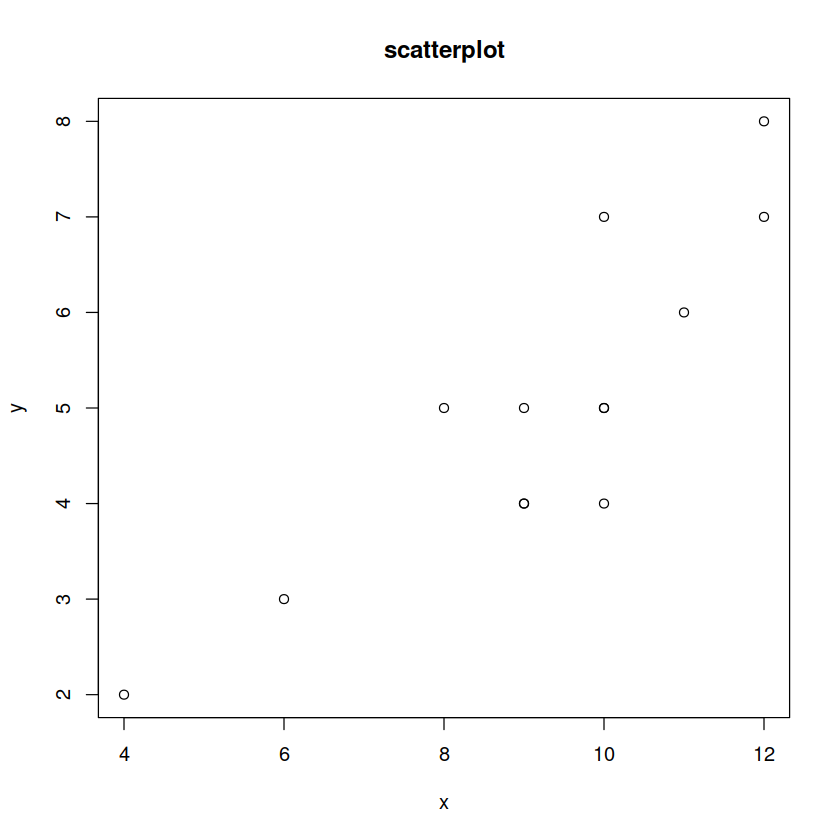

In [45]:
plot(x,y,main="scatterplot")

+ Is there a positive or a negative association between X and Y?

In [52]:
# positive


+ Compute the covariance and the coefficient of correlation.


In [53]:
cov(x,y)

[1] 3.25

In [54]:
cor(x,y)

[1] 0.861269

+ Compute the regression line Y = a + bX.


In [55]:
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -0.9694       0.6467  


+ Find the predicted test score for someone with 8
  units of time spent in exercises.

In [56]:
model<-lm(y~x)

In [57]:
intercept<-model$coefficients[1] # c
coeff<-model$coefficients[2]  # m

In [59]:
intercept

(Intercept) 
 -0.9693878

In [60]:
coeff

x 
0.6466837

 nun $y=-0.969387755102043 + 0.646683673469388*x$

In [61]:
var=8
yhat=-0.969387755102043 + 0.646683673469388*var

In [62]:
yhat

[1] 4.204082

+ Compute the proportion of variation explained by
  the simple linear regression.

In [63]:
cor(x,y)**2

[1] 0.7417842

In [64]:
## proportion of variationis r**2 where r is coff of correlation

In [65]:
x

[1] 10  9  9 11 10 10  6 10  8 12  9  4 12

In [66]:
y

[1] 5 5 4 6 7 5 3 4 5 7 4 2 8

In [67]:
df<-tibble(x=x,y=y)

In [68]:
df

x,y
<dbl>,<dbl>
10,5
9,5
9,4
11,6
10,7
10,5
6,3
10,4
8,5


In [71]:
df %>% add_row(x=20,y=0) ->df

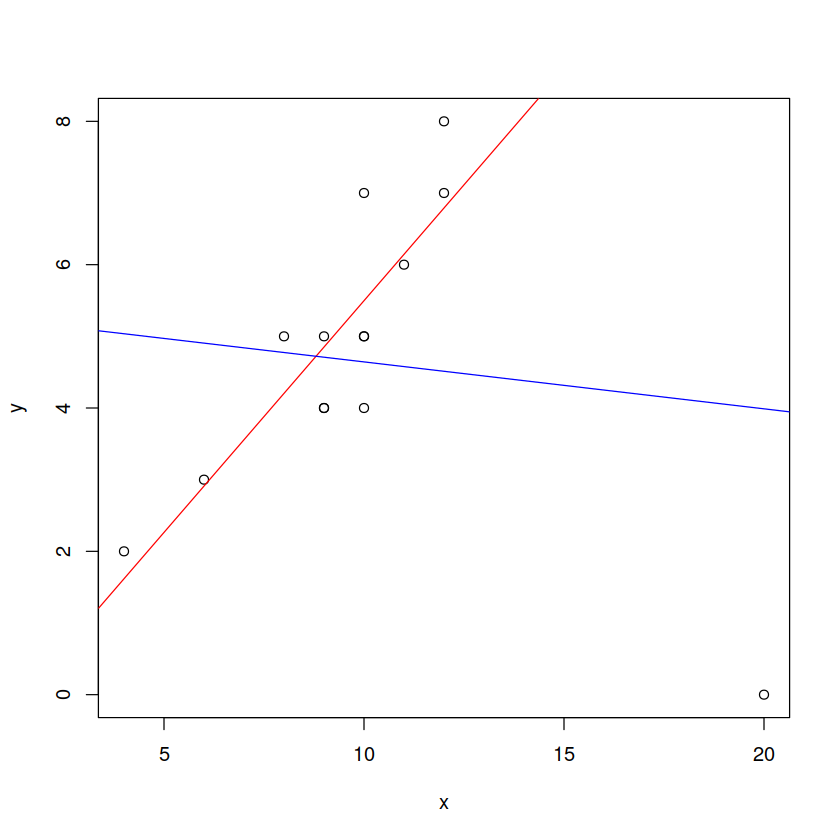

In [76]:
df %>% plot()
abline(lm(y~x),col="red")
abline(lm(df$y~df$x),col="blue")